# Country-wise exploratory analysis

This is the exploratory analysis of the data focusing of countries.

In [11]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

In [2]:
df = pd.read_csv('../data/ged171.csv')
df.columns

Index(['id', 'year', 'active_year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'side_b_new_id', 'gwnob', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'low', 'high'],
      dtype='object')

In [3]:
countries = df.drop_duplicates('country')['country'].sort_values().values

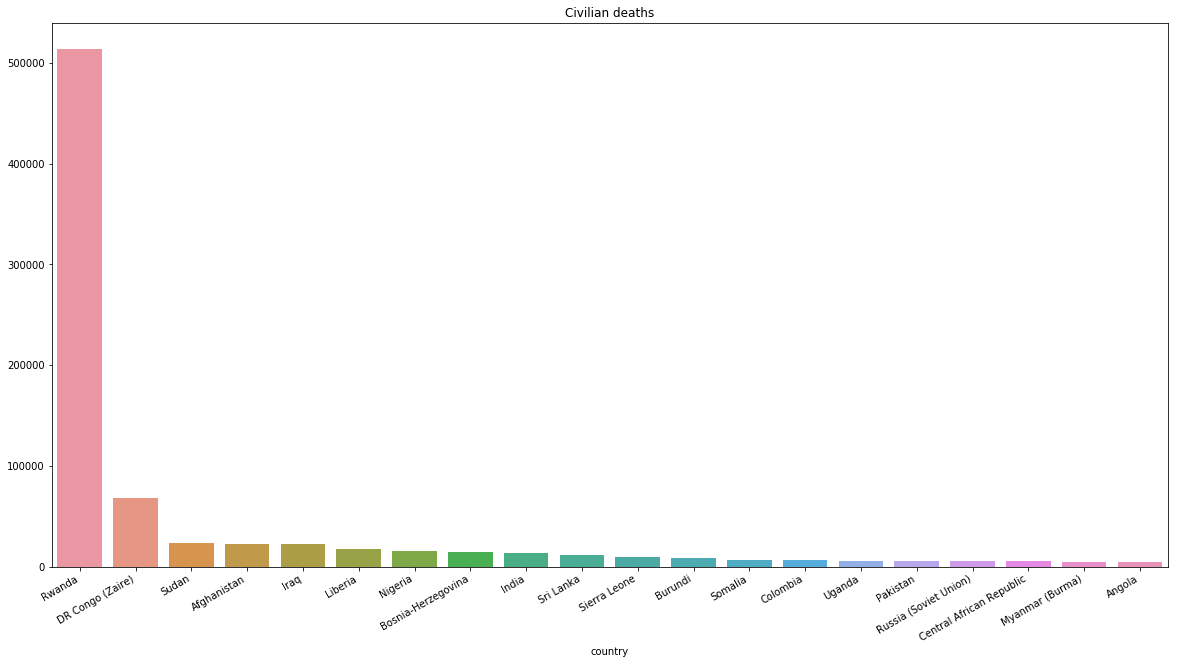

In [4]:
civilians = df.groupby('country')['deaths_civilians'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.barplot(x=civilians.index[0:20], y=civilians.values[0:20], ax=ax)
ax.set_xticklabels(civilians.index[0:20], rotation=30, horizontalalignment='right')
ax.set_title('Civilian deaths')
plt.show()

In [5]:
d = dict()
for i in countries:
    s = set()
    tmp = df.loc[df.country == i]
    s = s.union(set(tmp.loc[:,'side_a'].values))
    s = s.union(set(tmp.loc[:,'side_b'].values))
    d[i] = s

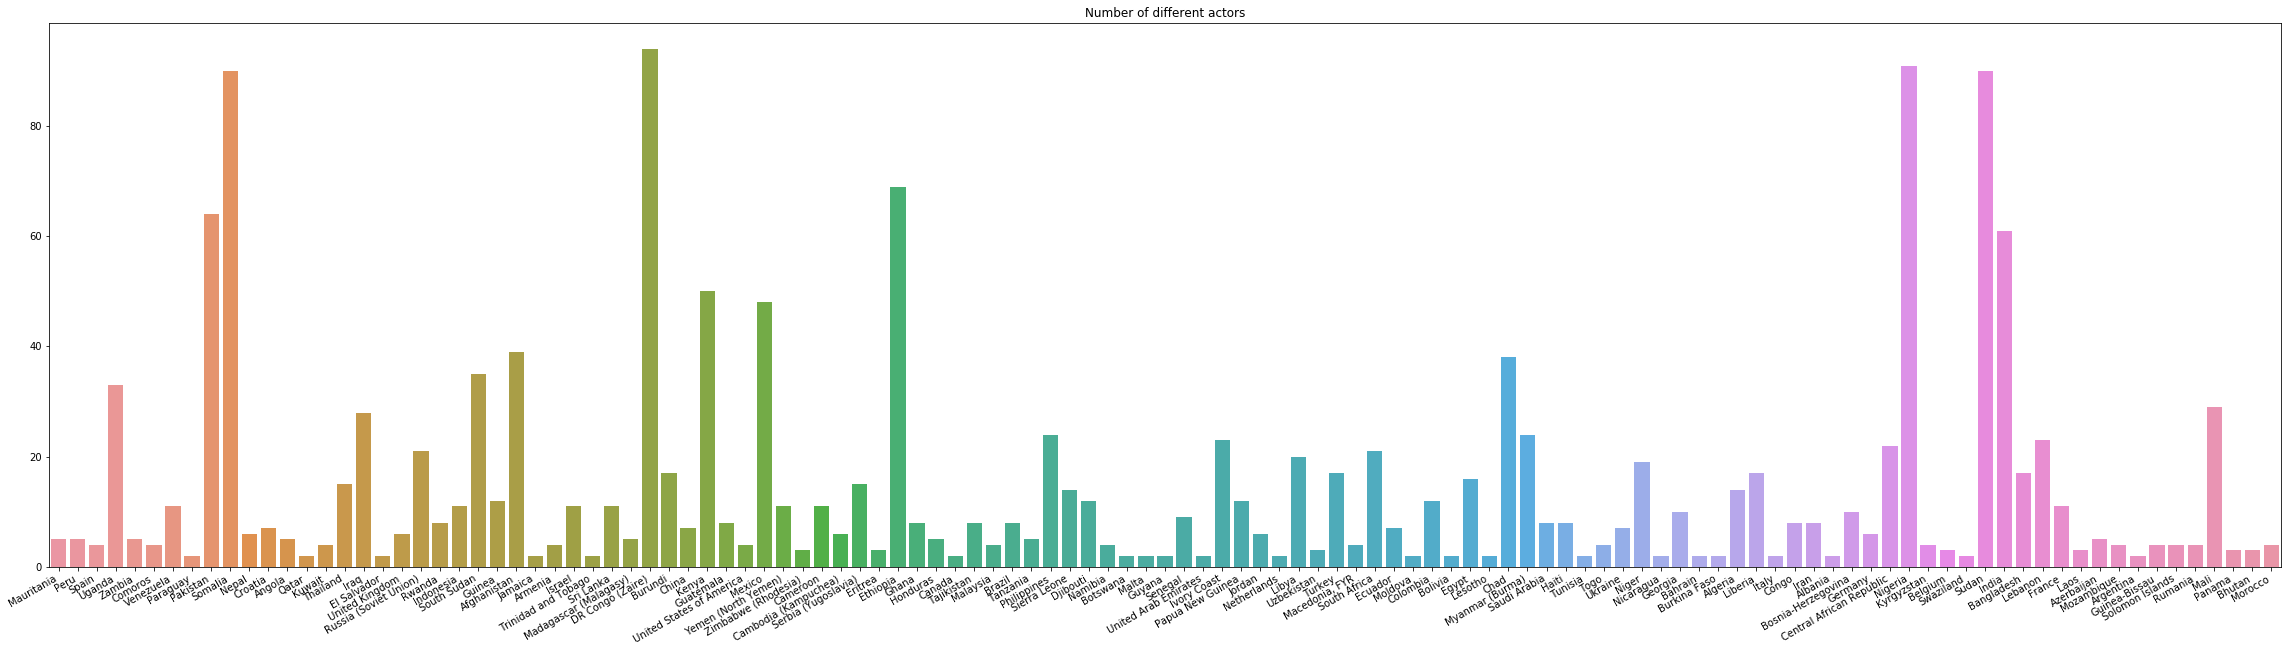

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40,10))
sns.barplot(x=list(d.keys()), y=[i for i in map(lambda x: len(x), d.values())], ax=ax)
ax.set_xticklabels(list(d.keys()), rotation=30, horizontalalignment='right')
ax.set_title('Number of different actors')
plt.show()

In [7]:
year_country = df.groupby(['country', 'year'])['deaths_civilians'].sum()
tmp = pd.DataFrame(year_country)
ev = pd.DataFrame(index=countries, columns=df.drop_duplicates('year')['year'].sort_values().values)
ev.fillna(value=0, inplace=True)

for i in tmp.index:
    ev.loc[i[0], i[1]] = tmp.loc[i].values
    
ev.head()

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Afghanistan,303,101,49,1695,637,120,185,483,353,6341,...,669,763,1099,1178,1024,908,930,876,899,1076
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,1,5,37,30,15,9,361,143,...,31,58,48,26,17,23,27,1,1,0
Angola,297,191,212,32,761,304,56,1,45,214,...,1,1,0,6,0,0,0,0,0,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


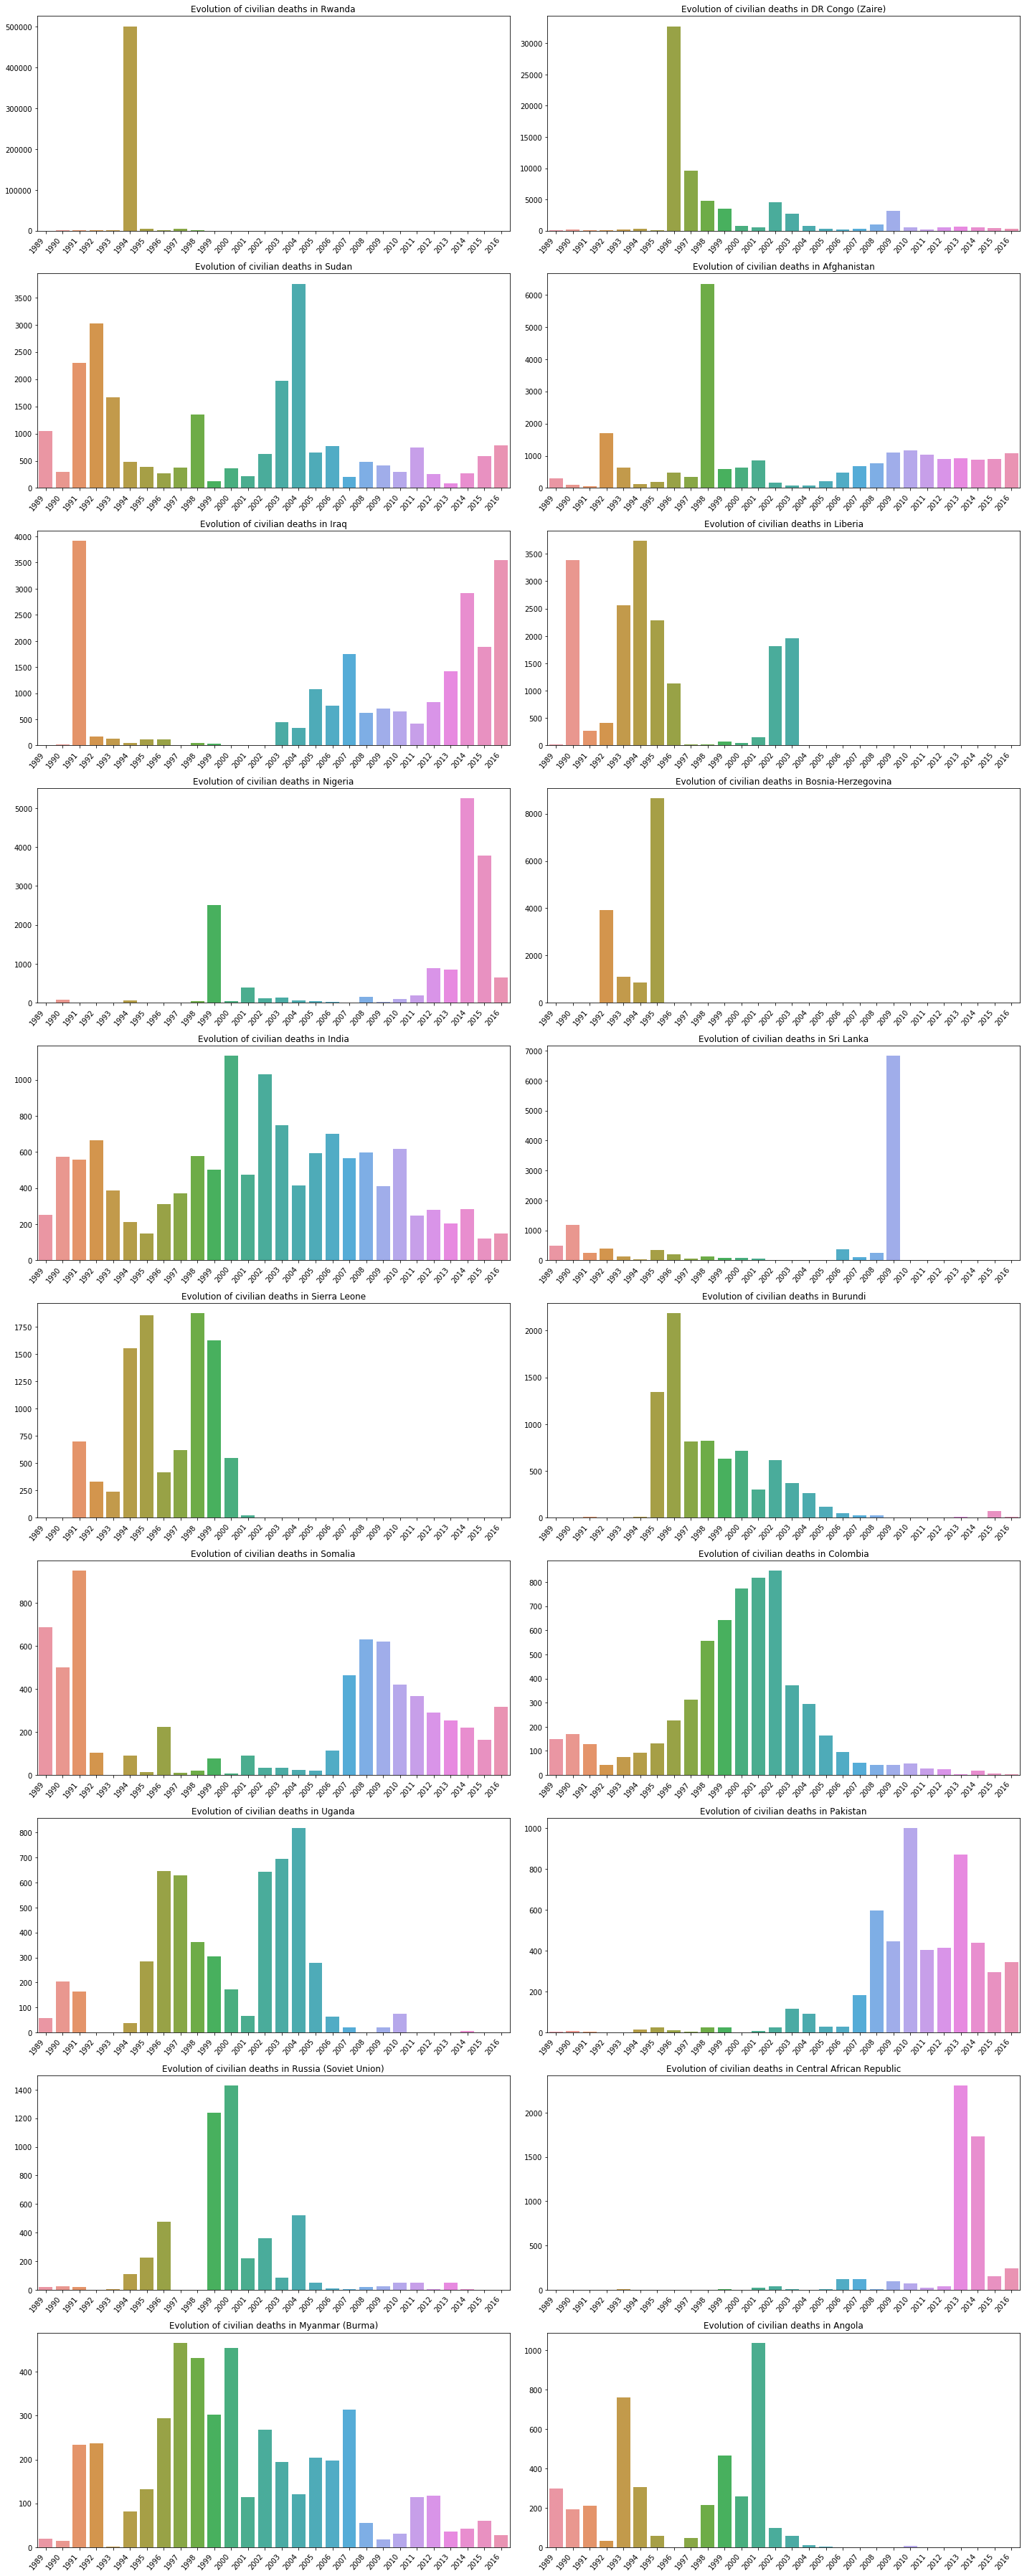

In [8]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(20,50))
for i, name in enumerate(civilians.index[0:20]):
    sns.barplot(x=ev.columns, y=ev.loc[name].values, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_xticklabels(ev.columns, rotation=50, horizontalalignment='right')
    ax[i//2, i%2].set_title('Evolution of civilian deaths in {}'.format(name))
plt.tight_layout()
plt.show()

In [9]:
df['event'] = 1
tmp = pd.DataFrame(df.groupby(['country', 'year'])['event'].sum())
events_count = pd.DataFrame(index=countries, columns=df.drop_duplicates('year')['year'].sort_values().values)
events_count.fillna(value=0, inplace=True)

for i in tmp.index:
    events_count.loc[i[0], i[1]] = tmp.loc[i].values
    
events_count.head()

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Afghanistan,145,45,64,76,115,244,219,234,199,216,...,1042,1114,1514,1806,2198,2305,1926,2120,2263,2423
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,1,4,120,269,350,394,123,128,383,...,128,111,191,92,125,124,73,43,46,27
Angola,258,181,18,34,220,319,74,26,30,108,...,22,9,9,3,2,0,1,4,2,8
Argentina,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
topo_path = '../data/topojson-master/world-countries-sans-antarctica.json'
topo_data = json.load(open(topo_path))

In [13]:
topo_data.keys()

dict_keys(['arcs', 'transform', 'type', 'objects'])

In [14]:
topo_data['objects'].keys()

dict_keys(['countries2', 'countries1'])

In [19]:
topo_data['objects']['countries1']['geometries']

[{'arcs': [[0, 1, 2, 3, 4, 5]],
  'id': 'AFG',
  'properties': {'Alpha-2': 'AF', 'name': 'Afghanistan'},
  'type': 'Polygon'},
 {'arcs': [[[6, 7, 8, 9]], [[10, 11, 12]]],
  'id': 'AGO',
  'properties': {'Alpha-2': 'AO', 'name': 'Angola'},
  'type': 'MultiPolygon'},
 {'arcs': [[13, 14, 15, 16, 17]],
  'id': 'ALB',
  'properties': {'Alpha-2': 'AL', 'name': 'Albania'},
  'type': 'Polygon'},
 {'arcs': [[18, 19, 20, 21, 22]],
  'id': 'ARE',
  'properties': {'Alpha-2': 'AE', 'name': 'United Arab Emirates'},
  'type': 'Polygon'},
 {'arcs': [[[23, 24]], [[25, 26, 27, 28, 29, 30]]],
  'id': 'ARG',
  'properties': {'Alpha-2': 'AR', 'name': 'Argentina'},
  'type': 'MultiPolygon'},
 {'arcs': [[31, 32, 33, 34, 35]],
  'id': 'ARM',
  'properties': {'Alpha-2': 'AM', 'name': 'Armenia'},
  'type': 'Polygon'},
 {'arcs': [[36]],
  'id': 'ATF',
  'properties': {'Alpha-2': 'TF',
   'name': 'French Southern and Antarctic Lands'},
  'type': 'Polygon'},
 {'arcs': [[[37]], [[38]]],
  'id': 'AUS',
  'properties